# Match Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning and Exploration

In [6]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [4]:
matches.shape

(756, 14)

In [5]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only CSK VS RR matches

In [7]:
CR =matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Rajasthan Royals'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Rajasthan Royals'))]

In [8]:
CR.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
83,2008,Jaipur,2008-05-04,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium
110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk"
117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
137,2009,Centurion,2009-04-30,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,38,0,SK Raina,SuperSport Park
152,2009,Kimberley,2009-05-09,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Chennai Super Kings,0,7,S Badrinath,De Beers Diamond Oval


In [10]:
CR.shape

(21, 14)

In [11]:
CR.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [12]:
CR.isnull().sum()

season             0
city               1
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [14]:
CR.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,21.0,11.523810,19.868616,0.0,0.0,0.0,12.0,64.0
win_by_wickets,21.0,3.238095,3.176551,0.0,0.0,4.0,5.0,8.0


## HEAD TO HEAD

In [42]:
CR.groupby("winner")["winner"].count()

winner
Chennai Super Kings    14
Rajasthan Royals        7
Name: winner, dtype: int64

Text(0.5, 1.0, 'CSK VS RR - head to head')

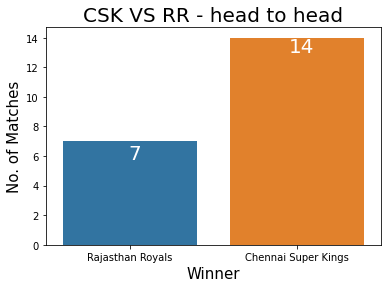

In [21]:
sns.countplot(CR["winner"])
plt.text(-0.01,5.8,str(CR['winner'].value_counts()['Rajasthan Royals']),size=20,color='white')
plt.text(0.95,13,str(CR['winner'].value_counts()['Chennai Super Kings']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('CSK VS RR - head to head',fontsize = 20)

In [50]:
Season_wise_Match_Winner = pd.DataFrame(CR.groupby(["season","winner"])["winner"].count())
print("Season wise winner of matches between CSK VS RR :")
Season_wise_Match_Winner

Season wise winner of matches between CSK VS RR :


winner
season winner                     
2008   Rajasthan Royals          3
2009   Chennai Super Kings       2
2010   Chennai Super Kings       1
       Rajasthan Royals          1
2011   Chennai Super Kings       2
2012   Chennai Super Kings       2
2013   Chennai Super Kings       1
       Rajasthan Royals          1
2014   Chennai Super Kings       2
2015   Chennai Super Kings       1
       Rajasthan Royals          1
2018   Chennai Super Kings       1
       Rajasthan Royals          1
2019   Chennai Super Kings       2

## Winning Percentage

In [51]:
Winning_Percentage = CR['winner'].value_counts()/len(CR['winner'])

In [52]:
print(" CSK winning percentage against RR(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print(" RR winning percentage against CSK(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

 CSK winning percentage against RR(overall) : 67%
 RR winning percentage against CSK(overall) : 33%


## Performance Analysis

In [53]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [54]:
performance("Chennai Super Kings",CR)

Number of times given team win while defending : 7
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  31.0
Average wickets by which a given team wins while chasing :  6.0


In [55]:
performance("Rajasthan Royals",CR)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 5

Average runs by which a given team wins while defending  :  14.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [60]:
Toss_Decision = pd.DataFrame(CR.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision 

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Chennai Super Kings bat                        5
                    field                      2
Rajasthan Royals    bat                        7
                    field                      7

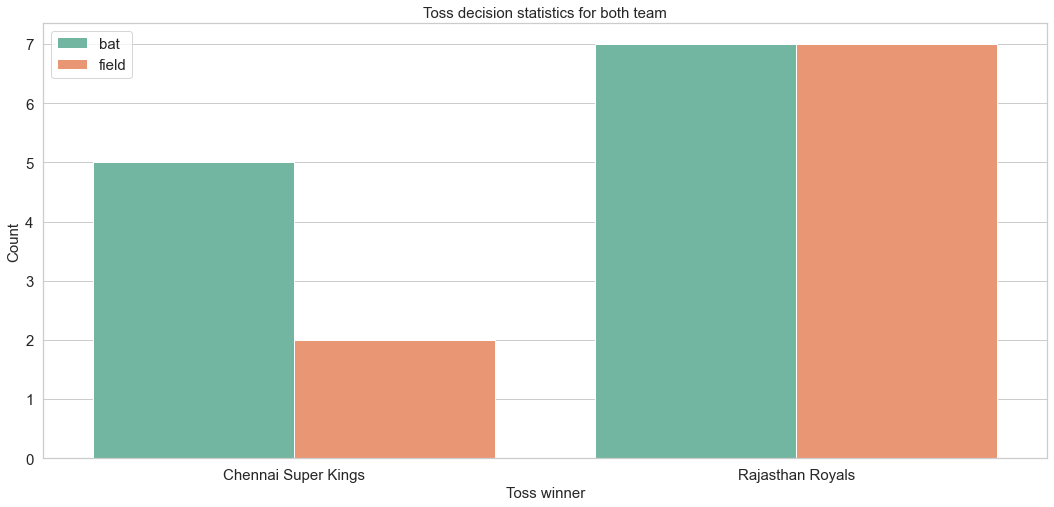

In [61]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(CR['toss_winner'],palette='Set2',hue=CR['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [62]:
Toss_Decision_based_Winner = pd.DataFrame(CR.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Chennai Super Kings bat           Chennai Super Kings       2
                                  Rajasthan Royals          3
                    field         Chennai Super Kings       2
Rajasthan Royals    bat           Chennai Super Kings       5
                                  Rajasthan Royals          2
                    field         Chennai Super Kings       5
                                  Rajasthan Royals          2

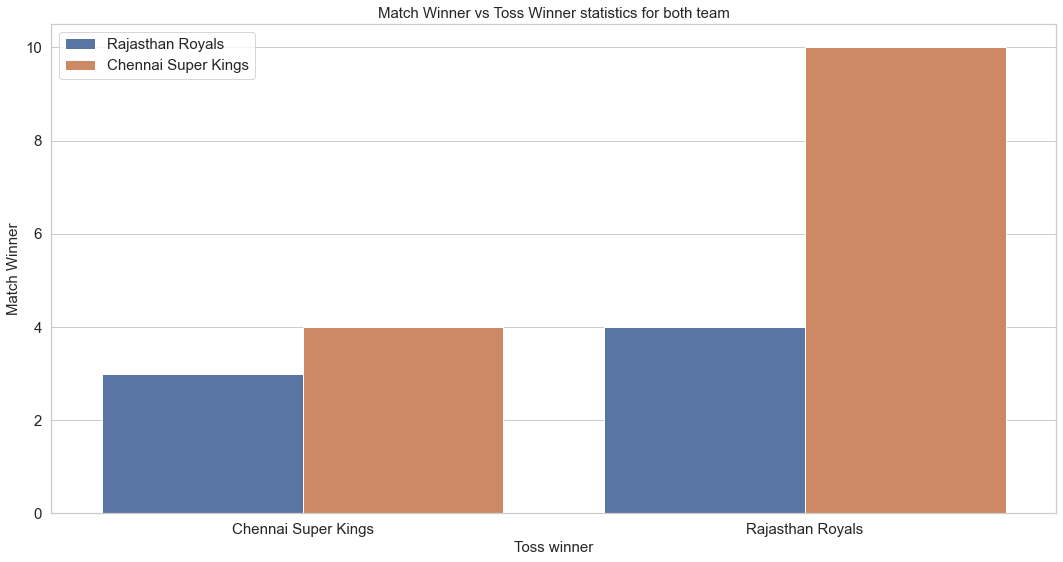

In [63]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CR['toss_winner'],hue=CR['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

#### Toss Decision based Analysis of both the teams seperately :

In [64]:
CSK = CR[CR["toss_winner"]=="Chennai Super Kings"]
RR = CR[CR["toss_winner"]=="Rajasthan Royals"]

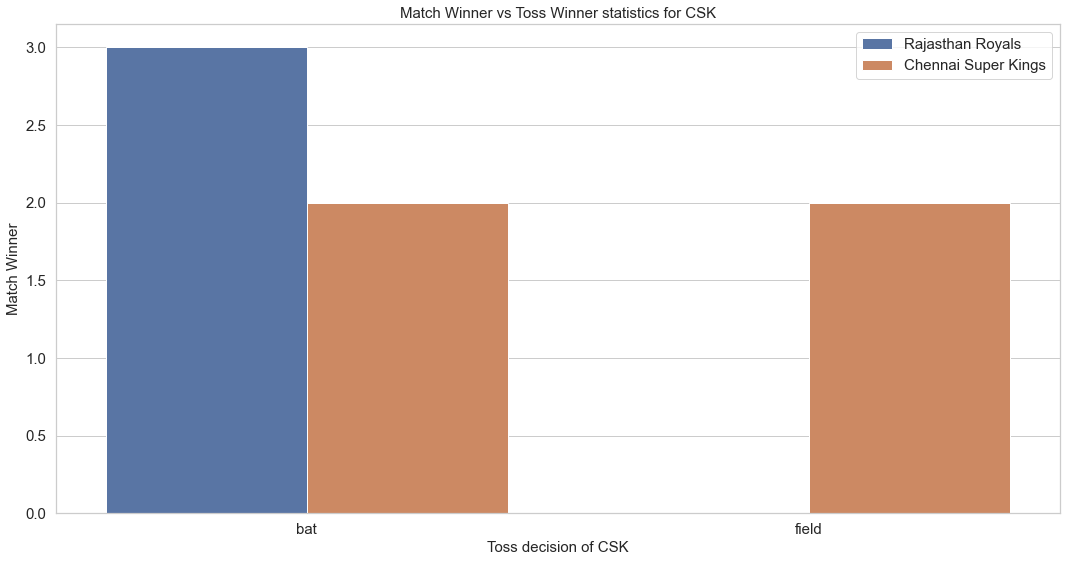

In [65]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CSK['toss_decision'],hue=CSK['winner'])
plt.title('Match Winner vs Toss Winner statistics for CSK',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of CSK',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

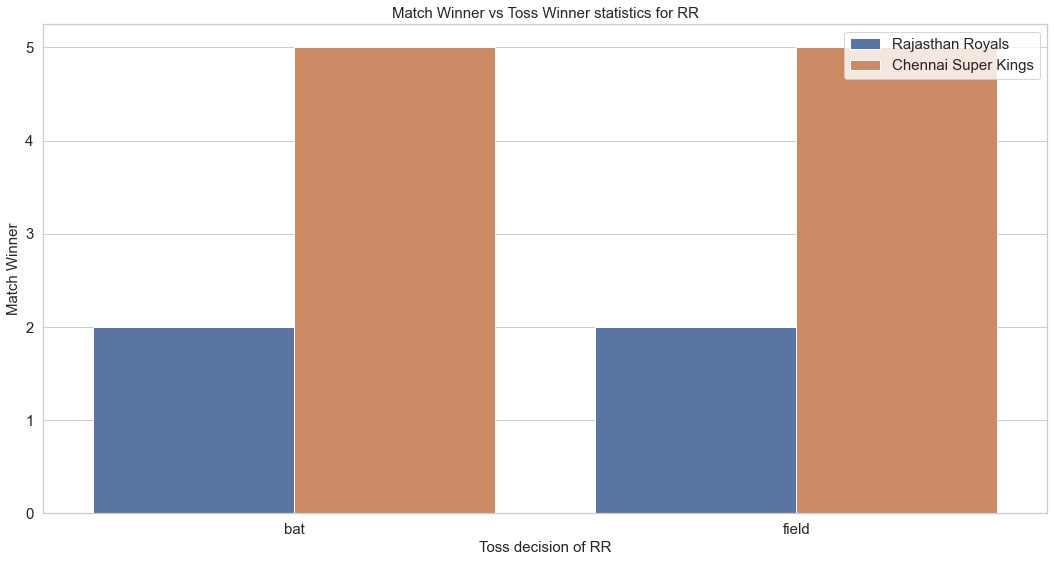

In [66]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RR['toss_decision'],hue=RR['winner'])
plt.title('Match Winner vs Toss Winner statistics for RR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [67]:
player_of_the_match = pd.DataFrame(CR.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
RA Jadeja,3
M Vijay,2
SR Watson,2
MS Dhoni,2
MEK Hussey,2
Sohail Tanvir,1
AM Rahane,1
SK Raina,1
S Badrinath,1
NV Ojha,1


### Recent Year Performance Analysis

In [68]:
cond1 = CR["season"] == 2018
cond2 = CR["season"] == 2019
final = CR[cond1 | cond2]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7910,2018,Pune,20/04/18,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,64,0,SR Watson,Maharashtra Cricket Association Stadium
7936,2018,Jaipur,11/05/18,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,4,JC Buttler,Sawai Mansingh Stadium
11148,2019,Chennai,31/03/19,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,8,0,MS Dhoni,M. A. Chidambaram Stadium
11316,2019,Jaipur,11/04/19,Rajasthan Royals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Sawai Mansingh Stadium


In [69]:
final.shape

(4, 14)

In [70]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
MS Dhoni,2
JC Buttler,1
SR Watson,1


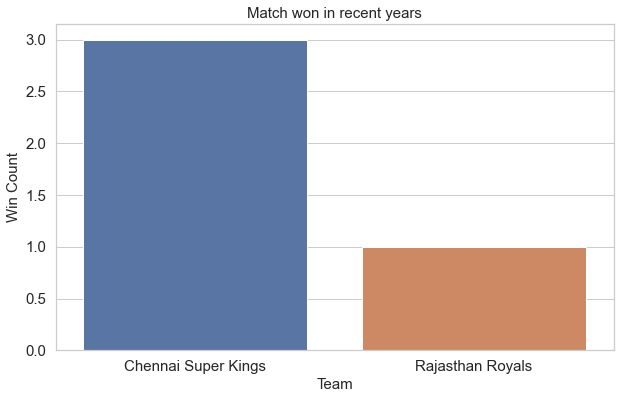

In [71]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

On the basis of all the analysis done related to head to head , toss decision , toss decision based winner , win loss ratio etc we can see that CSK has dominated the RR while both Chasing and Defending the score.

So we can predict CSK to be the favorite for this match.